In [1]:
from turtle import forward
import numpy as np
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset
import torch.utils.data as Data
import data_loader as dl
import train as tt
import os
import matplotlib.pyplot as plt

{'AA': 0, 'AT': 1, 'AC': 2, 'AG': 3, 'TA': 4, 'TT': 5, 'TC': 6, 'TG': 7, 'CA': 8, 'CT': 9, 'CC': 10, 'CG': 11, 'GA': 12, 'GT': 13, 'GC': 14, 'GG': 15}


In [2]:
n=1

In [3]:
net=torch.load(f"generate_data{n}/model/10000.pt")
lossf=nn.SmoothL1Loss(reduction="mean")
print(net)

sgrna_net(
  (embed1): Embedding(16, 2)
  (embed2): Embedding(4, 1)
  (embed3): Embedding(4, 1)
  (lin4): Linear(in_features=38, out_features=1, bias=True)
)


In [4]:
item = os.listdir(f"./data{n}/test")
print(item)

['G_part.npy', 'V_part.npy', 'HF.npy']


In [5]:
"""item = os.listdir("/home/zcc/Desktop/res")
print(item)"""

'item = os.listdir("/home/zcc/Desktop/res")\nprint(item)'

In [6]:
for i in range(len(item)):
    print(item[i])
    input=torch.LongTensor([i]).cuda()
    print("de",net.embed2(input).detach().cpu().numpy()[0,0],"dt",torch.sigmoid(net.embed3(input)).detach().cpu().numpy()[0,0])

G_part.npy
de 0.97443885 dt 0.8108207
V_part.npy
de 2.1271577 dt 0.79109234
HF.npy
de 0.7554546 dt 0.24779096


########################1################


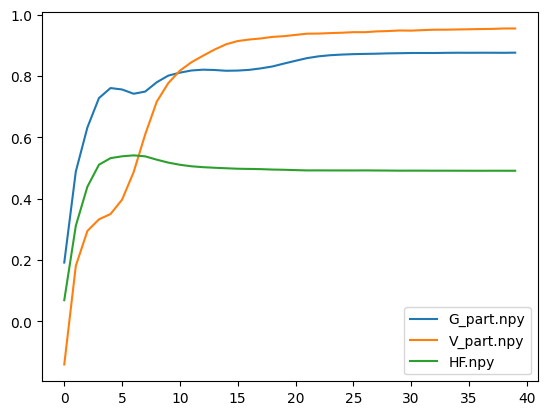

########################2################


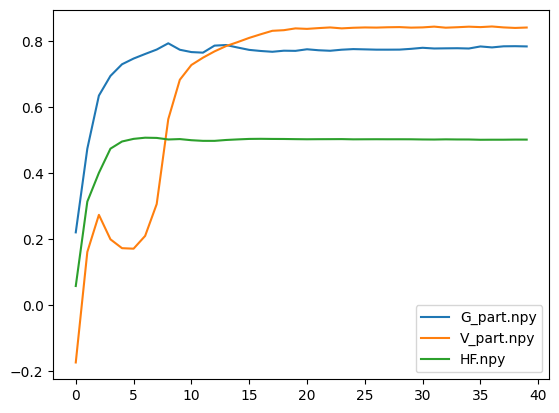

########################3################


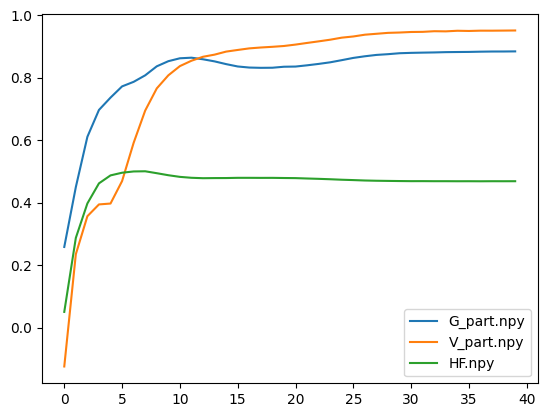

########################4################


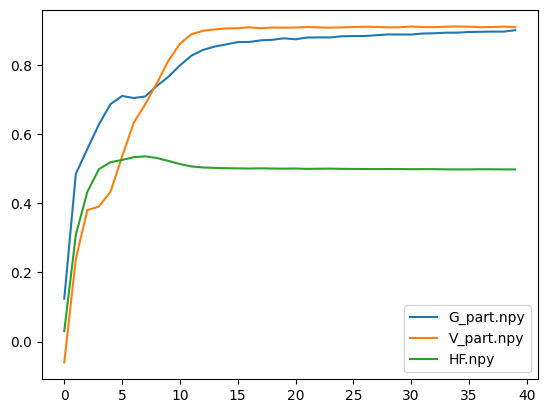

########################5################


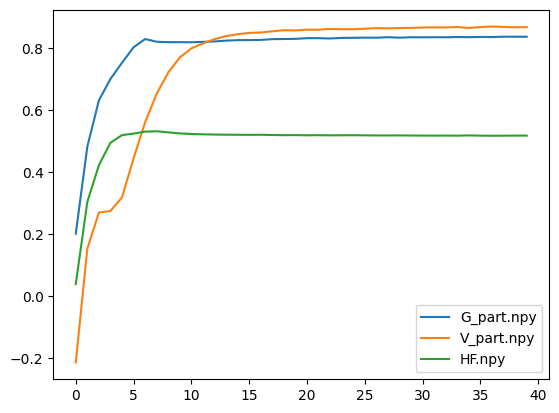

########################6################


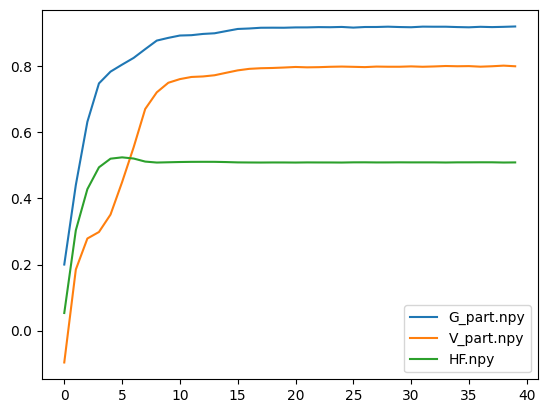

########################7################


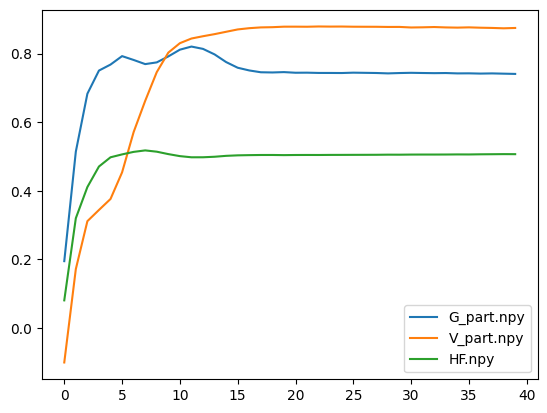

########################8################


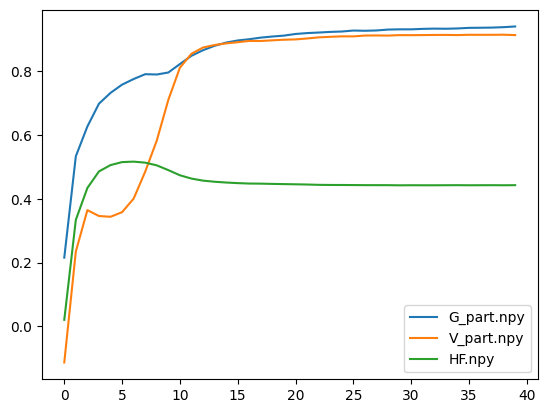

########################9################


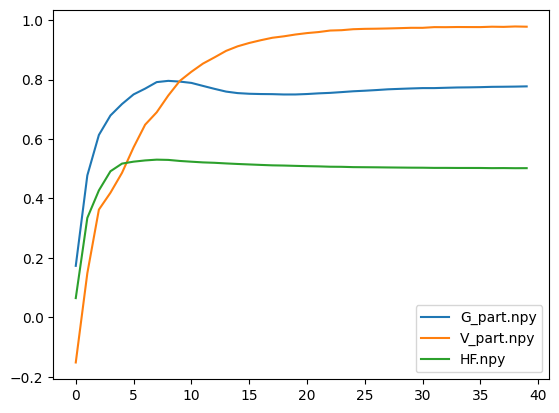

########################10################


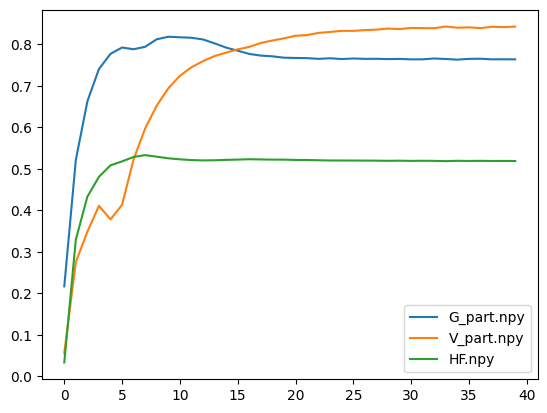

########################11################


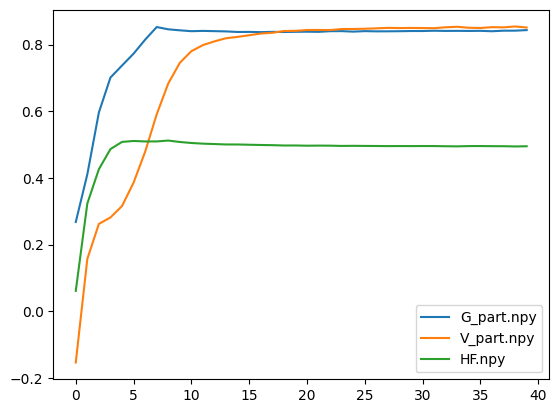

########################12################


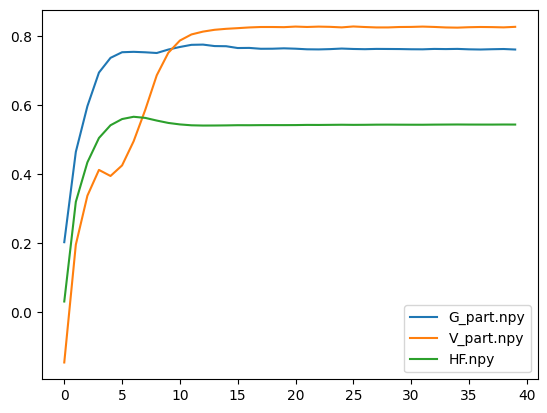

########################13################


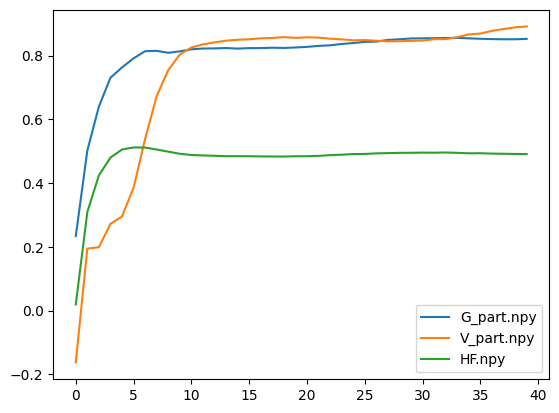

########################14################


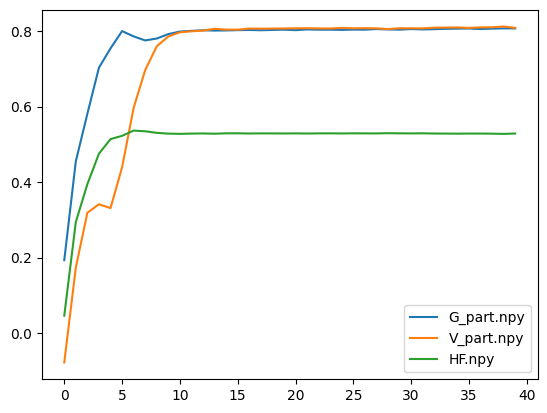

########################15################


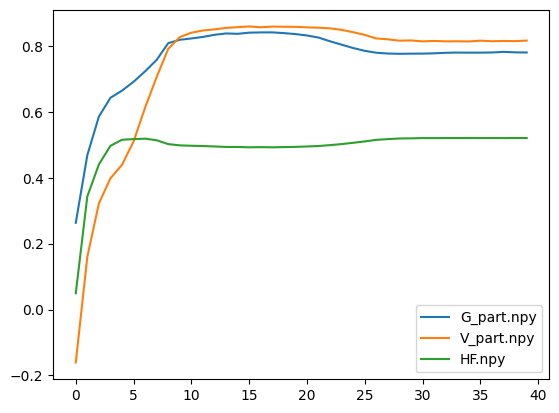

########################16################


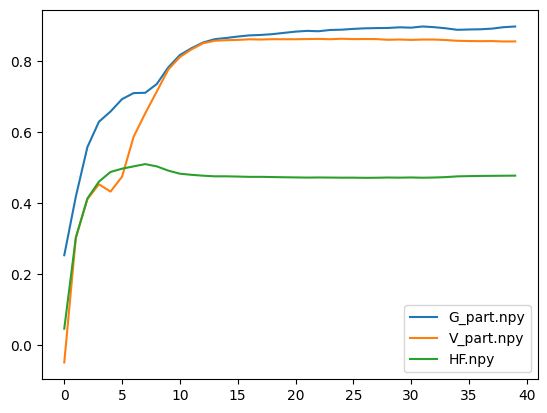

########################17################


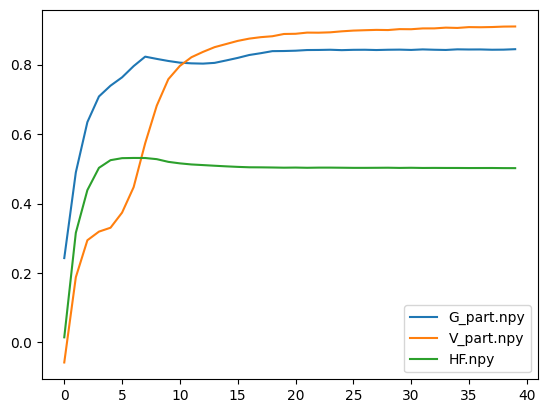

########################18################


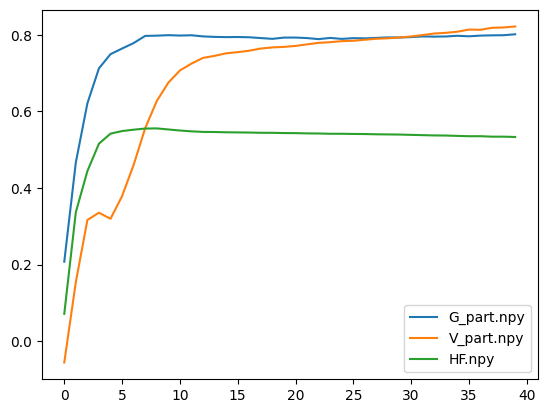

In [7]:
save =[[] for i in range(3)]
for n in range(1,19):
    print(f"########################{n}################")
    s1 = [[] for i in range(3)]
    for state in range(40):
        
        net=torch.load(f"generate_data{n}/model/{1000*state}.pt")
        cout=0
        item = ["G_part.npy","V_part.npy","HF.npy"]
        #plt.figure(figsize=(5,5))
        for i in item:
            data=dl.data_loader(dic=f"./data{n}/train",file=i,filetype=cout)
            #data=dl.data_loader(dic=f"./data{n}/test",file=i,filetype=3)
            cout+=1
            valoader=Data.DataLoader(dataset=data ,batch_size=1000,shuffle=False)
            presave=[]
            effsave=[]
            for seq,typ,eff in valoader:
                seq=seq.cuda()
                typ=typ.cuda()
                eff=eff.cuda()
                pre=net(seq,typ,)
                pre=pre.detach().cpu().numpy()
                eff=eff.detach().cpu().numpy()
                if len(presave)==0:
                    presave=np.copy(pre)
                    effsave=np.copy(eff)
                else:
                    presave=np.concatenate((presave,pre))
                    effsave=np.concatenate((effsave,eff))
            s1[cout-1].append(np.corrcoef(effsave.flatten(),presave.flatten())[0,1])
            #plt.figure(figsize=(5,5))
            #plt.scatter(effsave.flatten(),presave.flatten(),s=1)
            if state == 39:
                np.save(f"./zf/train_{i[:-4]}_pre_data{n}",presave)

    """for i,j in zip(s1,item):
        plt.plot(i,label = j)
        plt.show()"""
    for i,j in zip(s1,item):
        #print(j)
        plt.plot(i,label = j)
        plt.legend()
    plt.show()
    for k in range(3):
        save[k].append(s1[k][-2])

In [8]:
save=np.array(save)
print(save)
np.save("./zf/our.npy",save)

[[0.87589421 0.78497614 0.88399216 0.89587113 0.83668171 0.91959179
  0.74151093 0.93905273 0.77644609 0.76424917 0.8418659  0.76333395
  0.8513329  0.8069169  0.7809226  0.89437864 0.84326974 0.79888119]
 [0.95521952 0.84037821 0.95092775 0.91039741 0.86715414 0.80212788
  0.87384648 0.91538171 0.9787634  0.84173988 0.85443191 0.82609138
  0.88879475 0.8119111  0.81499571 0.85413414 0.90968831 0.81911861]
 [0.49120906 0.50155683 0.46861339 0.49780214 0.51733721 0.50877933
  0.50681519 0.44292482 0.50189124 0.51918868 0.49453646 0.54440975
  0.4915403  0.52757532 0.52103373 0.47610866 0.50198657 0.53395064]]


['G_part.npy', 'V_part.npy', 'HF.npy']
[0.8332871  0.87306124 0.50262552]


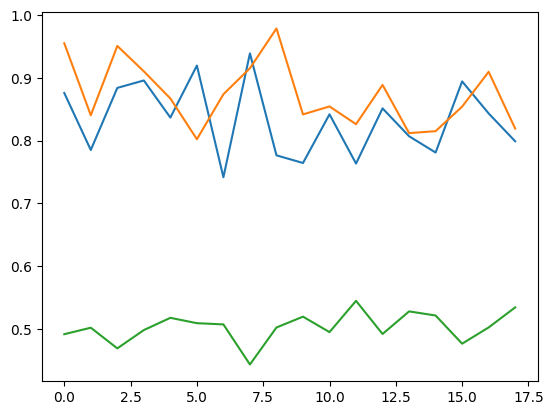

In [9]:

for i in save:
    plt.plot(i)
print(item)
print(np.mean(save,axis=-1))


########################0################
########################1################
########################2################
########################3################
########################4################
########################5################
########################6################
########################7################
########################8################
########################9################
########################10################
########################11################
########################12################
########################13################
########################14################
########################15################
########################16################
########################17################
########################18################
########################19################
########################20################
########################21################
########################22################
#####################

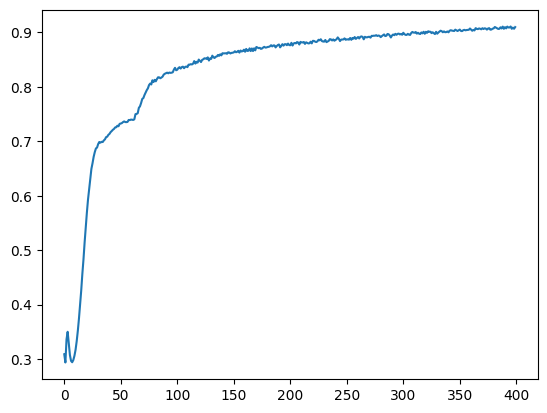

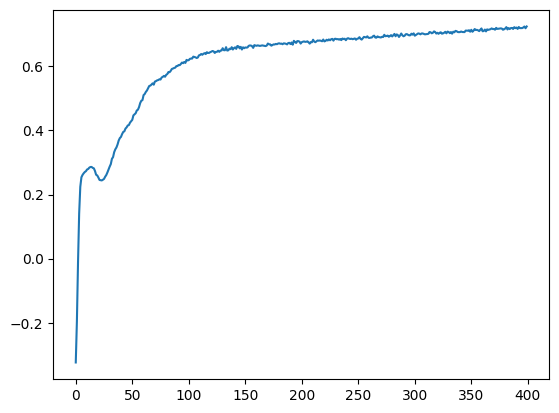

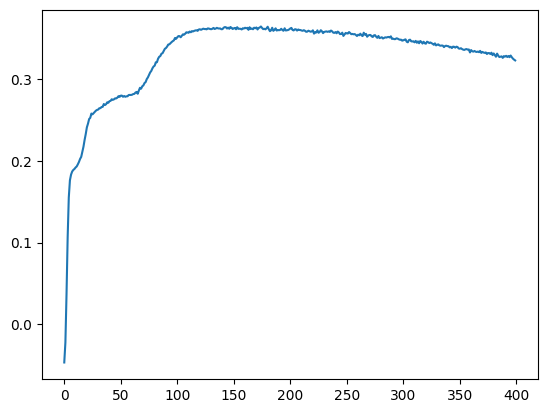

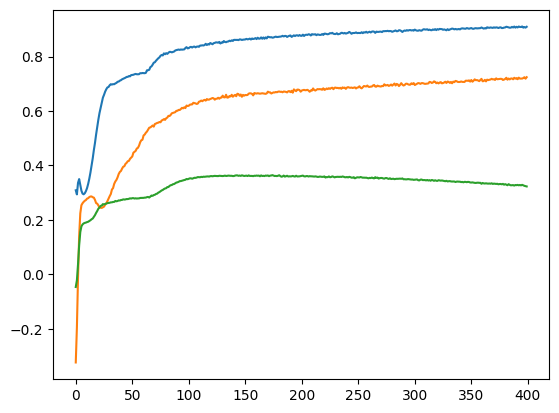

In [10]:
s1 = [[] for i in range(4)]
for state in range(400):
    print(f"########################{state}################")
    net=torch.load(f"generate_data{n}/model/{100*state}.pt")
    cout=0
    item = ["G_part.npy","V_part.npy","HF.npy"]
    #plt.figure(figsize=(5,5))
    for i in item:
        data=dl.data_loader(dic=f"./data{n}/test",file=i,filetype=cout)
        cout+=1
        valoader=Data.DataLoader(dataset=data ,batch_size=1000,shuffle=True)
        presave=[]
        effsave=[]
        for seq,typ,eff in valoader:
            seq=seq.cuda()
            typ=typ.cuda()
            eff=eff.cuda()
            pre=net(seq,typ,)
            pre=pre.detach().cpu().numpy()
            eff=eff.detach().cpu().numpy()
            if len(presave)==0:
                presave=np.copy(pre)
                effsave=np.copy(eff)
            else:
                presave=np.concatenate((presave,pre))
                effsave=np.concatenate((effsave,eff))
        s1[cout-1].append(np.corrcoef(effsave.flatten(),presave.flatten())[0,1])
        #plt.figure(figsize=(5,5))
        #plt.scatter(effsave.flatten(),presave.flatten(),s=1)

for i,j in zip(s1,item):
    plt.plot(i,label = j)
    plt.show()
for i,j in zip(s1,item):
    plt.plot(i,label = j)
plt.show()